In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import shapiro
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def get_Xy(num=1, to_numpy=False):
    X = pd.read_csv(f'/content/drive/MyDrive/data/task1_{num}_learn_X.csv', header=None, sep=' ')
    y = pd.read_csv(f'/content/drive/MyDrive/data/task1_{num}_learn_y.csv', header=None, sep=' ')[0]
    if to_numpy:
        return X.to_numpy(), y.to_numpy()
    return X, y

def draw_stats(X, y):
    sns.heatmap(X.corr())
    # data = X.copy()
    # data['answers'] = y
    # sns.pairplot(data=data, hue='answers')

def NUM(y_true, y_pred):
    return np.sum([y_pred != y_true])

def ASY_1(y_true, y_pred):
    P = np.array([[-9, 9], [1, 0]])
    k = 0
    for i, j in zip(y_true, y_pred):
        k += P[int(i), int(j)]
    return k

def ASY_2(y_true, y_pred):
    P = np.array([[-1, 3], [2, -1]])
    k = 0
    for i, j in zip(y_true, y_pred):
        k += P[int(i), int(j)]
    return k

In [ ]:
X_train, y_train = get_Xy(num=6)

In [ ]:
X_train.shape

(1000, 200)

In [ ]:
y_train.mean()

0.486

In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-9.803392,-41.186155,-524.565018,2.129957,-7.279869,-220.098546,-251.635588,-37.156041,4.335900,-43.707966,...,-69.182378,-61.342476,-69.386434,-233.308305,-111.051969,-102.689263,-122.937739,-487.175589,-378.012206,-93.642142
std,3634.529408,4557.220642,9720.386422,3522.966203,307.435095,7593.915914,5510.010250,3193.301721,6177.121406,4981.399297,...,4458.101554,1741.610229,2414.230948,7126.469748,14553.491732,8254.067974,4352.504276,12234.276407,10101.546168,1686.215484
min,-13020.911058,-17975.903611,-34461.281238,-9230.377732,-972.312996,-22257.834493,-19456.668638,-10632.418969,-20197.802951,-13382.031167,...,-16071.055805,-5112.165849,-8343.018074,-19509.260948,-49872.105862,-24376.671482,-14373.450851,-36860.777765,-27453.174957,-6083.223634
25%,-2485.486280,-3464.400075,-7312.681272,-2361.932535,-215.865890,-5466.443514,-4182.343979,-2267.933404,-3954.929350,-3578.711027,...,-3030.253926,-1203.711351,-1610.472589,-4993.073683,-9920.641728,-5615.376968,-3254.765363,-9037.240809,-7292.868244,-1243.868031
50%,111.369468,-147.861889,-610.367886,-51.480266,-12.937122,-303.667483,8.026754,-97.050358,-132.999832,-34.033226,...,95.056948,-60.267052,11.689245,-268.191576,44.200713,-164.895915,-9.037005,-619.717500,-317.544284,-60.449937
75%,2556.231118,3165.666580,6791.588187,2346.140662,199.699324,4931.224802,3509.665004,2105.429315,4146.792172,3370.657441,...,3064.704842,1153.555286,1612.610297,4587.538051,10186.122134,5686.441083,2969.762525,7955.047615,6331.487339,1093.916811
max,11427.887017,12790.359725,27759.604061,11590.340585,961.366874,20186.844967,19466.992435,9537.636076,22808.734037,15407.039208,...,14119.946082,5207.257460,7448.121192,21327.910372,44927.396076,23451.669710,13451.695070,33788.592578,39846.336770,5033.373014


<Axes: >

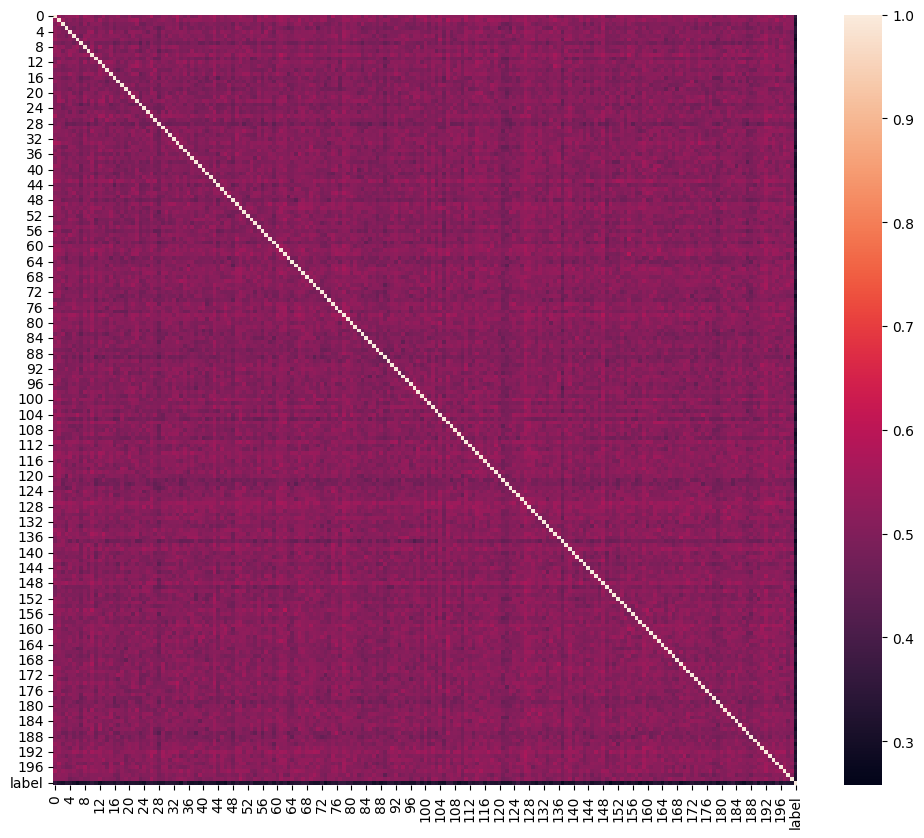

In [ ]:
Xy = X_train.copy()
Xy['label'] = y_train.values.astype('int32')
corr_matrix = Xy.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix)

In [ ]:
KLs = []
pos_ind = np.where(y_train == 1)[0]
neg_ind = np.where(y_train == 0)[0]

for col in X_train.columns:
    X_0 = X_train.loc[neg_ind, col].values
    X_1 = X_train.loc[pos_ind, col].values
    shapiro_0 = shapiro(X_0)[0]
    shapiro_1 = shapiro(X_1)[0]
    mu_0, std_0 = norm.fit(X_0)
    mu_1, std_1 = norm.fit(X_1)

    KL_div = np.log(std_1 / std_0) + (std_0**2 + (mu_0 - mu_1)**2)/(std_1**2) - 1
    print("KL_div: %.3f, Shapiro_ps: (%.3f, %.3f), N(%.3f, %3f), N(%.3f, %3f)"
          %(KL_div, shapiro_0, shapiro_1, mu_0, std_0, mu_1, std_1))
    KLs.append(KL_div)

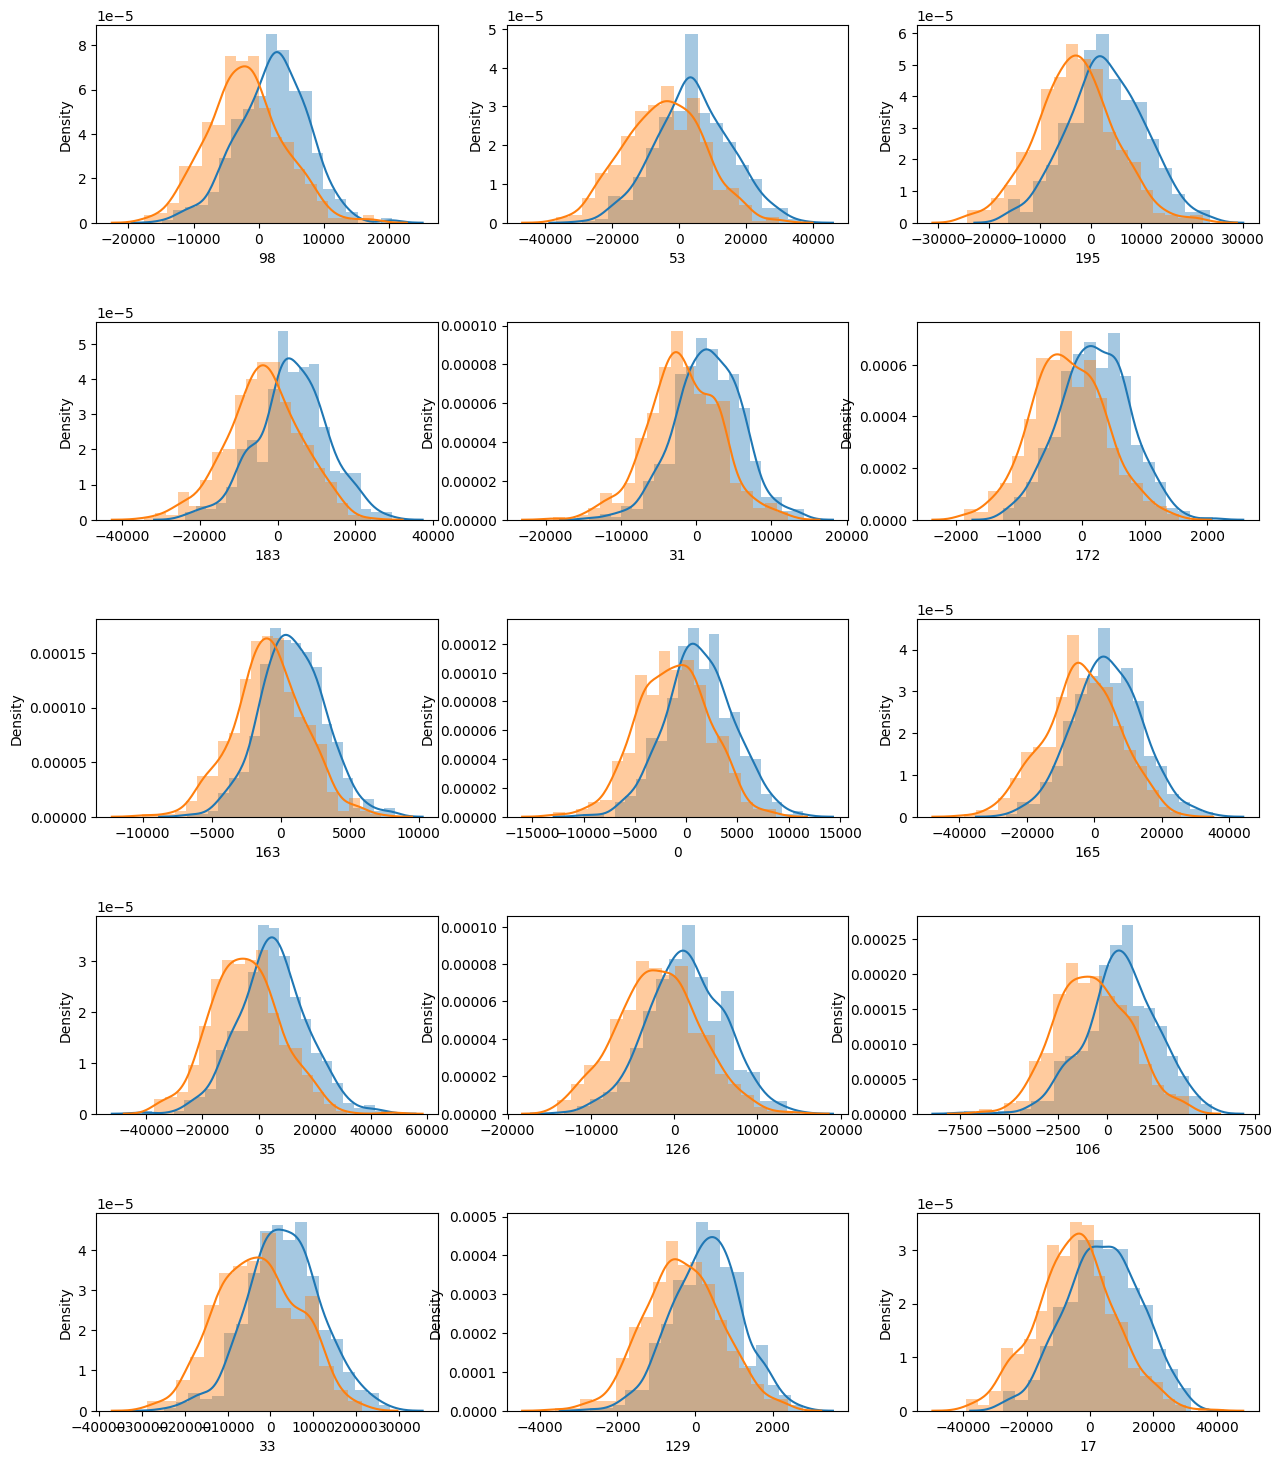

In [ ]:
top_KL_cols = X_train.columns[np.argsort(np.array(KLs))][::-1][:15]

fig, axs = plt.subplots(5, 3, figsize=(15, 18))
plt.subplots_adjust(hspace=0.5)

def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

axs = trim_axs(axs, len(top_KL_cols))

for i, col in enumerate(X_train[top_KL_cols].columns):
    sns.distplot(X_train[top_KL_cols][col][y_train==1], ax=axs[i])
    sns.distplot(X_train[top_KL_cols][col][y_train==0], ax=axs[i])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.naive_bayes import GaussianNB

In [ ]:
import tqdm

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
def threshold_func(model, X, y):
    y_proba_pred = cross_val_predict(model, X, y, cv=skf, method='predict_proba')[:,1] # for class '1'
    thresholds = np.linspace(0, 1, 501)
    fig, axs = plt.subplots(ncols=3, figsize=(16, 4))
    nums, acy1s, acy2s = [], [], []
    for thres in tqdm.tqdm(thresholds):
        y_pred = np.array([int(x>thres) for x in y_proba_pred])
        conf_mat = confusion_matrix(y, y_pred)

        num = np.sum([y_pred!=y.values])
        nums.append(num)

        acy1 = np.sum(np.array([[-9, 9], [1, 0]]) * conf_mat)
        acy1s.append(acy1)

        acy2 = np.sum(np.array([[-1, 3], [2, -1]]) * conf_mat)
        acy2s.append(acy2)

    loc_min = np.argmin(nums)
    num_thres = thresholds[loc_min]
    axs[0].plot(thresholds, nums, c='C0', lw=1.5, label='NUM, p=%.2f'%num_thres)
    axs[0].scatter(thresholds[loc_min], nums[loc_min], c='C0', s=25)
    axs[0].legend();

    loc_min = np.argmin(acy1s)
    acy1_thres = thresholds[loc_min]
    axs[1].plot(thresholds, acy1s, c='C1', lw=1.5, label='ACY1, p=%.2f'%acy1_thres)
    axs[1].scatter(thresholds[loc_min], acy1s[loc_min], c='C1', s=25)
    axs[1].legend();

    loc_min = np.argmin(acy2s)
    acy2_thres = thresholds[loc_min]
    axs[2].plot(thresholds, acy2s, c='C2', lw=1.5, label='ACY2, p=%.2f'%acy2_thres)
    axs[2].scatter(thresholds[loc_min], acy2s[loc_min], c='C2', s=25)
    axs[2].legend();

    return num_thres, acy1_thres, acy2_thres

In [ ]:
model = GaussianNB()

res = []
for i in range(1, len(top_KL_cols) + 1):
    res_i = np.mean(cross_val_score(model, X_train[top_KL_cols[:i]], y_train, scoring='roc_auc', cv=5))
    res.append(res_i)

best_k = np.argmax(res) + 1

In [ ]:
best_k

12

100%|██████████| 501/501 [00:01<00:00, 434.25it/s]


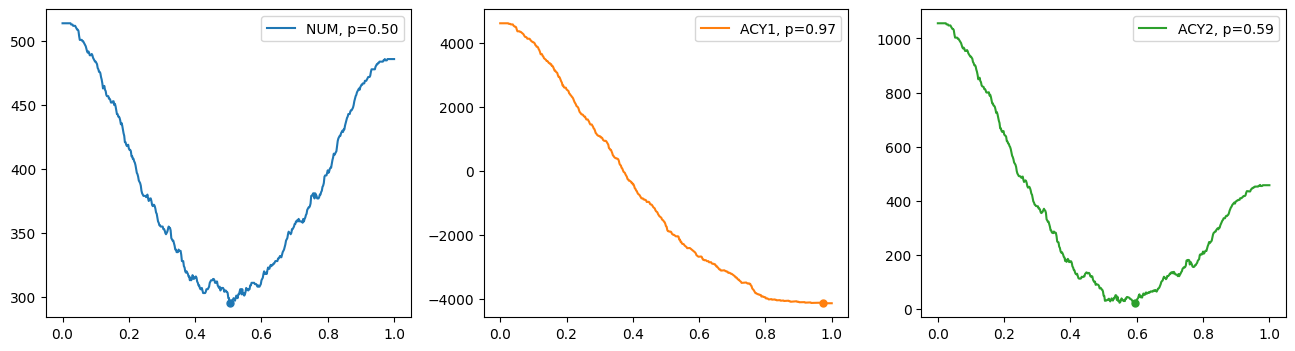

In [ ]:
model = LogisticRegression()
num_thres, acy1_thres, acy2_thres = threshold_func(model, X_train[top_KL_cols[:best_k]], y_train)

In [ ]:
def thres_num(clf, X, y):
    thres = num_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x>thres) for x in y_proba_pred])
    return np.sum([y_pred!=y.values])

def thres_roc_auc(clf, X, y):
    y_proba_pred = clf.predict_proba(X)[:,1]
    return roc_auc_score(y, y_proba_pred)

def thres_acy1(clf, X, y):
    thres = acy1_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x>thres) for x in y_proba_pred])
    conf_mat = confusion_matrix(y, y_pred)
    acy1 = np.sum(np.array([[-9, 9], [1, 0]]) * conf_mat)
    return acy1

def thres_acy2(clf, X, y):
    thres = acy2_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x>thres) for x in y_proba_pred])
    conf_mat = confusion_matrix(y, y_pred)
    acy2 = np.sum(np.array([[-1, 3], [2, -1]]) * conf_mat)
    return acy2

In [ ]:
model = LogisticRegression()
num_thres, acy1_thres, acy2_thres = 0.5, 1, 0.6

metrics = {}
metrics["ROC_AUC"] = np.mean(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_roc_auc, cv=skf))
metrics["NUM"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_num, cv=skf))
metrics["ASY1"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy1, cv=skf))
metrics["ASY2"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy2, cv=skf))
print(metrics)

{'ROC_AUC': 0.7668533773233044, 'NUM': 299, 'ASY1': -4140, 'ASY2': 35}


In [ ]:
X = X_train[top_KL_cols[:best_k]]
new_col = X_train[top_KL_cols[best_k:]].sum(axis=1)
X[best_k] = new_col

100%|██████████| 501/501 [00:05<00:00, 92.63it/s]


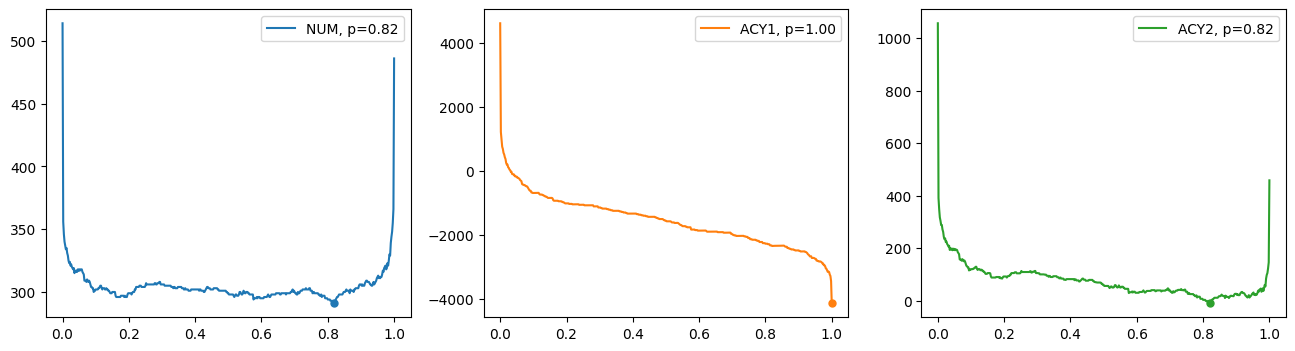

In [ ]:
model = GaussianNB()
num_thres, acy1_thres, acy2_thres = threshold_func(model, X, y_train)

In [ ]:
model = GaussianNB()

metrics = {}
metrics["ROC_AUC"] = np.mean(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_roc_auc, cv=skf))
metrics["NUM"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_num, cv=skf))
metrics["ASY1"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy1, cv=skf))
metrics["ASY2"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy2, cv=skf))
print(metrics)

{'ROC_AUC': 0.7744798910455984, 'NUM': 299, 'ASY1': -4140, 'ASY2': 13}


In [ ]:
model = LogisticRegression()
scoring = {
    "roc_auc": "roc_auc",
    "NUM": make_scorer(NUM),
    "ASY_1": make_scorer(ASY_1),
    "ASY_2": make_scorer(ASY_2)
}

info_train = cross_validate(model, X_train[[98, 53, 106, 33]], y_train, cv=5, n_jobs=8,
                            scoring=scoring,
                            return_estimator=True)

score_train_valid = info_train["test_roc_auc"]
logreg = info_train['estimator'][np.argmax(score_train_valid)]

for metric in scoring:
    value = info_train["test_" + metric]
    print(f"Metric: {metric}: {value}")
    if metric == "roc_auc":
        print(f"Mean roc_auc: {np.mean(value)}")
    else:
        print(f"Sum {metric}: {np.sum(value)}")
    print()

Metric: roc_auc: [0.74519808 0.77379642 0.76558903 0.71724552 0.75017516]
Mean roc_auc: 0.750400840948931

Metric: NUM: [64 60 61 69 56]
Sum NUM: 310

Metric: ASY_1: [-225 -340 -305 -246 -395]
Sum ASY_1: -1511

Metric: ASY_2: [29 11 16 43 -4]
Sum ASY_2: 95



In [ ]:
model = GaussianNB()

res = []
for i in range(1, len(top_KL_cols) + 1):
    res_i = np.mean(cross_val_score(model, X_train[top_KL_cols[:i]], y_train, scoring='roc_auc', cv=5))
    res.append(res_i)

best_k = np.argmax(res) + 1

In [ ]:
best_k

12

In [ ]:
model = GaussianNB()
scoring = {
    "roc_auc": "roc_auc",
    "NUM": make_scorer(NUM),
    "ASY_1": make_scorer(ASY_1),
    "ASY_2": make_scorer(ASY_2)
}

info_train = cross_validate(model, X_train[[98, 53, 106]], y_train, cv=5, n_jobs=8,
                            scoring=scoring,
                            return_estimator=True)

score_train_valid = info_train["test_roc_auc"]
gaussian_nb = info_train['estimator'][np.argmax(score_train_valid)]

for metric in scoring:
    value = info_train["test_" + metric]
    print(f"Metric: {metric}: {value}")
    if metric == "roc_auc":
        print(f"Mean roc_auc: {np.mean(value)}")
    else:
        print(f"Sum {metric}: {np.sum(value)}")
    print()

Metric: roc_auc: [0.74319728 0.7841057  0.75788209 0.71704534 0.75497948]
Mean roc_auc: 0.751441978052356

Metric: NUM: [62 55 64 66 55]
Sum NUM: 302

Metric: ASY_1: [-244 -345 -302 -266 -396]
Sum ASY_1: -1553

Metric: ASY_2: [22 -4 25 33 -7]
Sum ASY_2: 69



In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/data/task1_6_test_X.csv", delimiter=' ', header=None)
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-16.211280,11.757446,139.709741,26.419214,1.021421,-26.247585,35.306062,-18.513371,59.449795,58.227762,...,11.717049,19.763614,27.298917,29.199821,53.918667,52.190037,39.162251,178.180156,157.754714,20.894641
std,3621.277314,4397.321912,9943.366624,3617.432742,305.268717,7701.344332,5465.318627,3252.419218,6167.320145,5050.423544,...,4348.012887,1741.310417,2350.785045,7135.569358,14150.454784,8281.404459,4363.796798,11771.052611,9765.433188,1677.732901
min,-12756.703793,-17678.605971,-36506.126447,-12775.815902,-1150.994522,-29656.839184,-20029.010259,-11940.871990,-24437.938111,-18936.129961,...,-14781.202420,-6871.616058,-8215.871938,-31827.037702,-59143.154410,-31363.185841,-16845.527848,-47903.211887,-38864.980557,-6503.081003
25%,-2459.366974,-2961.775339,-6844.757073,-2434.227879,-207.943705,-5286.960519,-3669.094094,-2146.489180,-4126.659727,-3306.467356,...,-2948.686088,-1145.001922,-1553.484124,-4769.070336,-9455.857190,-5505.459714,-2957.718538,-7606.330653,-6523.827741,-1130.678688
50%,-15.539934,41.989578,117.910570,-40.325571,5.209685,20.503581,63.279090,-20.127399,74.444274,78.980955,...,-30.316191,5.319779,13.398264,-50.691733,-15.181327,-17.546902,22.897032,213.725468,147.760967,28.651260
75%,2477.373090,2972.988859,6932.512273,2484.743533,205.611030,5210.540867,3731.477272,2150.859649,4263.184935,3466.919144,...,2966.993731,1189.766575,1669.165257,4871.000182,9587.372428,5576.045234,3007.667612,8113.739424,6736.201737,1149.994421
max,14989.219274,15080.002580,35013.632574,13443.230293,1188.436924,32630.105487,21782.844249,11410.206065,24626.974177,21029.815708,...,15737.681502,7427.851554,8446.032063,28064.054255,56978.103136,31234.539446,14803.460003,43370.935283,34016.022342,7195.972618


In [ ]:
def num_predict(clf, X):
    thres = num_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x > thres) for x in y_proba_pred])
    return y_pred

def roc_auc_predict(clf, X):
    y_pred = clf.predict(X)
    return y_pred

def acy1_predict(clf, X):
    thres = acy1_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x > thres) for x in y_proba_pred])
    return y_pred

def acy2_predict(clf, X):
    thres = acy2_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x > thres) for x in y_proba_pred])
    return y_pred

num_thres, acy1_thres, acy2_thres = 0.5, 1, 0.7
model = GaussianNB()
model = model.fit(X_train[top_KL_cols[:best_k]], y_train)
roc_auc = model.predict_proba(X_test[top_KL_cols[:best_k]])[:, 1]
num = num_predict(model, X_test[top_KL_cols[:best_k]])
acy1 = acy1_predict(model, X_test[top_KL_cols[:best_k]])
acy2 = acy2_predict(model, X_test[top_KL_cols[:best_k]])

out = pd.DataFrame(data = np.array([roc_auc, num, acy1, acy2]).T.astype('int32'), columns=["AUC", "NUM", "ASY1", "ASY2"])
out["AUC"] = roc_auc

out.to_csv("task1_6_ans.csv", index=False, sep=',')

In [ ]:
roc_auc = gaussian_nb.predict_proba(X_test[top_KL_cols[:15]])[:, 1]
num = logreg.predict(X_test[top_KL_cols[:15]])
acy1 = logreg.predict(X_test[top_KL_cols[:15]])
acy2 = logreg.predict(X_test[top_KL_cols[:15]])

out = pd.DataFrame(data = np.array([roc_auc, num, acy1, acy2]).T.astype('int32'), columns=["AUC", "NUM", "ASY1", "ASY2"])
out["AUC"] = gaussian_nb.predict_proba(X_test[top_KL_cols[:15]])[:, 1]

out.to_csv("task1_6_ans.csv", index=False, sep=',')